In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [ ]:
cov_death_train=pd.read_csv('/content/drive/MyDrive/train.csv')
cov_death_test=pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
cov1 = [cov_death_train, cov_death_test]
cov = pd.concat(cov1)

In [ ]:
cov

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0
1,807936902,World,5023.0,2020,0.635,114.0,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0
2,773590408,World,5612.0,2020,0.710,116.0,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0
3,130466459,World,7580.0,2020,0.958,153.0,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0
4,544040446,World,8983.0,2020,1.136,187.0,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43047,713850901,Luxembourg,585.0,2021,915.033,0.0,0.000,766418.0,408405.0,NaN,455.0,991.0,119.88,63.88,NaN,0.07,1550.0,466.0,0.073,NaN
43048,980183629,Colombia,18120.0,2020,351.732,584.0,11.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43049,386597907,United Kingdom,38399.0,2021,570.725,592.0,8.799,30691557.0,28327873.0,2363684.0,NaN,598286.0,45.62,42.10,3.51,NaN,8892.0,498281.0,0.741,NaN
43050,293365001,Cyprus,22.0,2020,24.553,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cov_1=cov.fillna(0)   # replacing nan with 0

In [ ]:
LE = LabelEncoder()      # labelencoder for location coloumn
X_1=cov_1.copy()
#X_1[:,0] = LE.fit_transform(X_1[:,0])
X_1["Location"]= LE.fit_transform(X_1["Location"])

In [ ]:
X = X_1.iloc[:,:19]
X

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
0,911530868,220,2372.0,2020,0.300,65.0,0.008,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
1,807936902,220,5023.0,2020,0.635,114.0,0.014,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
2,773590408,220,5612.0,2020,0.710,116.0,0.015,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
3,130466459,220,7580.0,2020,0.958,153.0,0.019,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
4,544040446,220,8983.0,2020,1.136,187.0,0.024,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43047,713850901,122,585.0,2021,915.033,0.0,0.000,766418.0,408405.0,0.0,455.0,991.0,119.88,63.88,0.00,0.07,1550.0,466.0,0.073
43048,980183629,44,18120.0,2020,351.732,584.0,11.336,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
43049,386597907,211,38399.0,2021,570.725,592.0,8.799,30691557.0,28327873.0,2363684.0,0.0,598286.0,45.62,42.10,3.51,0.00,8892.0,498281.0,0.741
43050,293365001,53,22.0,2020,24.553,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000


In [ ]:
y = X_1.iloc[:,-1:]
y

,Next Week's Deaths
0,344.0
1,361.0
2,431.0
3,463.0
4,506.0
...,...
43047,0.0
43048,0.0
43049,0.0
43050,0.0


#scaling the data and then linear regression for that data (replaced by nan by0)

In [ ]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.389441,1.693779,-0.148445,-1.233058,-0.342030,-0.189314,-0.435400,-0.130396,-0.127657,-0.120247,-0.089942,-0.141317,-0.477223,-0.502290,-0.468312,-0.270282,-0.546622,-0.132153,-0.417629
1,0.990713,1.693779,-0.144182,-1.233058,-0.341946,-0.180064,-0.435155,-0.130396,-0.127657,-0.120247,-0.089942,-0.141317,-0.477223,-0.502290,-0.468312,-0.270282,-0.546622,-0.132153,-0.417629
2,0.858515,1.693779,-0.143235,-1.233058,-0.341928,-0.179687,-0.435114,-0.130396,-0.127657,-0.120247,-0.089942,-0.141317,-0.477223,-0.502290,-0.468312,-0.270282,-0.546622,-0.132153,-0.417629
3,-1.616841,1.693779,-0.140071,-1.233058,-0.341866,-0.172703,-0.434951,-0.130396,-0.127657,-0.120247,-0.089942,-0.141317,-0.477223,-0.502290,-0.468312,-0.270282,-0.546622,-0.132153,-0.417629
4,-0.025013,1.693779,-0.137815,-1.233058,-0.341821,-0.166285,-0.434747,-0.130396,-0.127657,-0.120247,-0.089942,-0.141317,-0.477223,-0.502290,-0.468312,-0.270282,-0.546622,-0.132153,-0.417629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172203,0.628580,0.183643,-0.151318,0.118736,-0.113452,-0.201583,-0.435727,-0.129089,-0.126168,-0.120247,-0.089936,-0.140828,1.566751,1.977279,-0.468312,-0.264169,-0.027469,-0.131590,0.025321
172204,1.653683,-1.018303,-0.123123,-1.233058,-0.254212,-0.091346,0.027389,-0.130396,-0.127657,-0.120247,-0.089942,-0.141317,-0.477223,-0.502290,-0.468312,-0.270282,-0.546622,-0.132153,-0.417629
172205,-0.631003,1.555093,-0.090516,0.118736,-0.199489,-0.089836,-0.076256,-0.078043,-0.024327,-0.110098,-0.089942,0.153917,0.300606,1.131866,-0.317364,-0.270282,2.431639,0.469287,4.078614
172206,-0.989852,-0.879617,-0.152224,-1.233058,-0.335970,-0.201583,-0.435727,-0.130396,-0.127657,-0.120247,-0.089942,-0.141317,-0.477223,-0.502290,-0.468312,-0.270282,-0.546622,-0.132153,-0.417629


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split( data,y,test_size=0.33, random_state=42)
model = LinearRegression()
model = model.fit(X_train,y_train)

Root Mean Square Error:

2428.357731418037
0.7101636772232496
Feature: 0, Score: 1.02536
Feature: 1, Score: 3.87075
Feature: 2, Score: 231.68999
Feature: 3, Score: -13.61032
Feature: 4, Score: -2.57344
Feature: 5, Score: 3837.92142
Feature: 6, Score: -8.71457
Feature: 7, Score: 103.32734
Feature: 8, Score: 577.28936
Feature: 9, Score: -648.05775
Feature: 10, Score: -84.94109
Feature: 11, Score: 21.17249
Feature: 12, Score: 1.61011
Feature: 13, Score: -25.08505
Feature: 14, Score: 33.10218
Feature: 15, Score: -22.16966
Feature: 16, Score: -6.77524
Feature: 17, Score: -193.38549
Feature: 18, Score: 6.64330


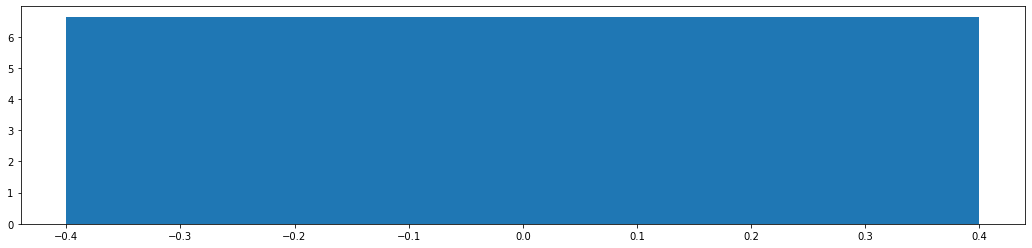

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(MSE**0.5)
print(r2)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))


# plot feature importance
plt.figure(figsize=(18,4))
plt.bar([i for i in range(len(importance))], importance[0][i])
plt.show()




In [ ]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))



Feature: 0, Score: 1.02536
Feature: 1, Score: 3.87075
Feature: 2, Score: 231.68999
Feature: 3, Score: -13.61032
Feature: 4, Score: -2.57344
Feature: 5, Score: 3837.92142
Feature: 6, Score: -8.71457
Feature: 7, Score: 103.32734
Feature: 8, Score: 577.28936
Feature: 9, Score: -648.05775
Feature: 10, Score: -84.94109
Feature: 11, Score: 21.17249
Feature: 12, Score: 1.61011
Feature: 13, Score: -25.08505
Feature: 14, Score: 33.10218
Feature: 15, Score: -22.16966
Feature: 16, Score: -6.77524
Feature: 17, Score: -193.38549
Feature: 18, Score: 6.64330


#creating a new data frame with features which has more weights





In [ ]:
#featute 2,5,7,8,9,17 have high weightage

In [ ]:
a1 = np.array(data[2])   # Weekly Cases
a2 = np.array(data[5])   # Weekly Deaths
a3 = np.array(data[7])   # Total Vaccinations
a4=  np.array(data[8])   # People Vaccinated
a5 = np.array(data[9])   # People Fully Vaccinated
a6 = np.array(data[17])  #  Daily People Vaccinated



In [ ]:
new_data= pd.DataFrame({'Weekly cases':a1,'Weekly Deaths':a2,'Total Vaccinations':a3,"People Vaccinated":a4,'People Fully Vaccinated':a5,'Daily People Vaccinated':a6})                  #creating a new dataframe with these features and dropping all the redundant features

In [ ]:
new_data

,Weekly cases,Weekly Deaths,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Daily People Vaccinated
0,-0.148524,-0.190158,-0.157655,-0.160067,-0.132153,-0.132153
1,-0.152224,-0.202029,-0.157655,-0.160067,-0.132153,-0.132153
2,-0.152166,-0.202029,-0.157655,-0.160067,-0.132153,-0.132153
3,-0.152248,-0.202029,-0.157655,-0.160067,-0.132153,-0.132153
4,-0.152248,-0.202029,-0.157655,-0.160067,-0.132153,-0.132153
...,...,...,...,...,...,...
172203,-0.147710,-0.179230,-0.151150,-0.154824,-0.131590,-0.131590
172204,-0.148403,-0.185825,-0.151957,-0.155094,-0.132153,-0.132153
172205,-0.148619,-0.189593,-0.155284,-0.158903,0.469287,0.469287
172206,-0.138428,-0.158692,-0.150405,-0.154561,-0.132153,-0.132153


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split( new_data,y,test_size=0.33, random_state=42)
model = LinearRegression()
model = model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(MSE**0.5)
print(r2)


Root Mean Square Error:

2428.6267845117936
0.7100994480708962


#using lasso

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split( data,y,test_size=0.33, random_state=42)
model = LinearRegression()
model = model.fit(X_train,y_train)

In [ ]:
from sklearn.linear_model import Lasso

# define model
model1 = Lasso(alpha=1.0)
# fit model
model1.fit(X_train, y_train)

y_new_predicted = model1.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_new_predicted)
r2 = r2_score(y_test, y_new_predicted)

# printing values
print('Slope:' ,model1.coef_)
print('Intercept:', model1.intercept_)
print('Mean squared error: ', mse**0.5)
print('R2 score',r2)

Slope: [ 4.43887543e-02  2.83958595e+00  2.29989938e+02 -1.22435558e+01
 -2.27173979e+00  3.83207699e+03 -7.14370337e+00  5.99385081e+01
  2.21087710e+02 -2.83865947e+02 -7.88069757e+01  1.09877868e+01
  1.01810592e+00  0.00000000e+00  3.59851924e+00 -1.81156886e+01
 -3.46755896e+00 -1.19909488e+02 -0.00000000e+00]
Intercept: [802.62329667]
Mean squared error:  2427.6509247556032
R2 score 0.7103323743043343


In [ ]:

from sklearn.linear_model import LassoCV
alpha1=[1e-2,1e-1,1,10,100]
lassoclf=LassoCV(alphas=alpha1,fit_intercept=True,cv=10)
lassoclf.fit(X_train,y_train)
print('alpha:', lassoclf.alpha_)
print("weight vectors",lassoclf.coef_ )
y_pred_tr_lasso= lassoclf.predict(X_train)
y_pred_lasso=lassoclf.predict(X_test)
r2 = r2_score(y_test, y_pred_lasso)
print('R2 score',r2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219665428.8918457, tolerance: 218591456.23997575
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329892587.15405273, tolerance: 221528878.69641984
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

alpha: 10.0
weight vectors [   0.            0.          210.45940155   -7.62167557   -0.
 3816.39935677   -0.           -0.           -0.          -30.80532619
  -53.16743105   -0.           -0.           -0.           -0.
   -8.87935207   -0.          -45.6731744    -0.        ]
R2 score 0.710619606162823


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263612620.09399414, tolerance: 215747168.06932276
  positive,


In [ ]:


# get importance
importance = model1.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04439
Feature: 1, Score: 2.83959
Feature: 2, Score: 229.98994
Feature: 3, Score: -12.24356
Feature: 4, Score: -2.27174
Feature: 5, Score: 3832.07699
Feature: 6, Score: -7.14370
Feature: 7, Score: 59.93851
Feature: 8, Score: 221.08771
Feature: 9, Score: -283.86595
Feature: 10, Score: -78.80698
Feature: 11, Score: 10.98779
Feature: 12, Score: 1.01811
Feature: 13, Score: 0.00000
Feature: 14, Score: 3.59852
Feature: 15, Score: -18.11569
Feature: 16, Score: -3.46756
Feature: 17, Score: -119.90949
Feature: 18, Score: -0.00000


In [ ]:
#2,5,8,9,17 has more weightage

In [ ]:
a1 = np.array(data[2])   # Weekly Cases
a2 = np.array(data[5])   # Weekly Deaths
a3=  np.array(data[8])   # People Vaccinated
a4 = np.array(data[9])   # People Fully Vaccinated
a5 = np.array(data[17])  #  Daily People Vaccinated

In [ ]:
new_data_lasso= pd.DataFrame({'Weekly cases':a1,'Weekly Deaths':a2,'People Vaccinated':a3,"People Fully Vaccinated":a4,'Daily People Vaccinated':a5})
                 #creating a new dataframe with these features and dropping all the redundant features

new_data_lasso

,Weekly cases,Weekly Deaths,People Vaccinated,People Fully Vaccinated,Daily People Vaccinated
0,-0.148445,-0.189314,-0.127657,-0.120247,-0.132153
1,-0.144182,-0.180064,-0.127657,-0.120247,-0.132153
2,-0.143235,-0.179687,-0.127657,-0.120247,-0.132153
3,-0.140071,-0.172703,-0.127657,-0.120247,-0.132153
4,-0.137815,-0.166285,-0.127657,-0.120247,-0.132153
...,...,...,...,...,...
172203,-0.151318,-0.201583,-0.126168,-0.120247,-0.131590
172204,-0.123123,-0.091346,-0.127657,-0.120247,-0.132153
172205,-0.090516,-0.089836,-0.024327,-0.110098,0.469287
172206,-0.152224,-0.201583,-0.127657,-0.120247,-0.132153


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split( new_data_lasso,y,test_size=0.33, random_state=42)   # retraining with only impoertant feautures


In [ ]:
from sklearn.linear_model import Lasso

# define model
model1 = Lasso(alpha=1.0)
# fit model
model1.fit(X_train, y_train)

y_new_predicted = model1.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_new_predicted)
r2 = r2_score(y_test, y_new_predicted)

# printing values
print('Slope:' ,model1.coef_)
print('Intercept:', model1.intercept_)
print('Mean squared error: ', mse**0.5)
print('R2 score',r2)

Slope: [ 4.43887543e-02  2.83958595e+00  2.29989938e+02 -1.22435558e+01
 -2.27173979e+00  3.83207699e+03 -7.14370337e+00  5.99385081e+01
  2.21087710e+02 -2.83865947e+02 -7.88069757e+01  1.09877868e+01
  1.01810592e+00  0.00000000e+00  3.59851924e+00 -1.81156886e+01
 -3.46755896e+00 -1.19909488e+02 -0.00000000e+00]
Intercept: [802.62329667]
Mean squared error:  2427.6509247556032
R2 score 0.7103323743043343


# data pre_processing by using padding

In [ ]:
df= cov.sort_values(by=["Year"])

In [ ]:
df_1=df.interpolate(method='pad', limit=1000000)

In [ ]:
df_1

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0
50957,729217043,Guinea-Bissau,71.0,2020,34.454,2.0,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
50958,359647600,Guinea-Bissau,107.0,2020,51.924,2.0,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
50959,614153245,Guinea-Bissau,56.0,2020,27.175,2.0,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
50960,340103002,Guinea-Bissau,56.0,2020,27.175,2.0,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94379,329173762,Paraguay,2878.0,2022,429.309,123.0,18.348,8183512.0,3821093.0,3217516.0,1144903.0,13582.0,122.07,57.00,48.00,17.08,2026.0,4524.0,0.067,66.0
94380,419028699,Paraguay,2447.0,2022,365.017,88.0,13.127,8183512.0,3821093.0,3217516.0,1144903.0,11897.0,122.07,57.00,48.00,17.08,1775.0,4291.0,0.064,45.0
94381,455553158,Paraguay,2313.0,2022,345.028,68.0,10.144,8218163.0,3828122.0,3233060.0,1156981.0,4950.0,122.59,57.10,48.23,17.26,738.0,1004.0,0.015,49.0
94368,897062159,Paraguay,8651.0,2022,1290.462,232.0,34.607,8218163.0,3828122.0,3233060.0,1156981.0,15137.0,122.59,57.10,48.23,17.26,2258.0,4751.0,0.071,133.0


In [ ]:
df_1.isna().sum()

Id                                       0
Location                                 0
Weekly Cases                             0
Year                                     0
Weekly Cases per Million                 0
Weekly Deaths                            0
Weekly Deaths per Million                0
Total Vaccinations                     403
People Vaccinated                      403
People Fully Vaccinated                454
Total Boosters                         454
Daily Vaccinations                     302
Total Vaccinations per Hundred         403
People Vaccinated per Hundred          403
People Fully Vaccinated per Hundred    454
Total Boosters per Hundred             454
Daily Vaccinations per Hundred         302
Daily People Vaccinated                403
Daily People Vaccinated per Hundred    403
Next Week's Deaths                       0
dtype: int64

In [ ]:
df_1=df_1.dropna()

In [ ]:
df_1

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,344.0
50957,729217043,Guinea-Bissau,71.0,2020,34.454,2.0,0.971,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,4.0
50958,359647600,Guinea-Bissau,107.0,2020,51.924,2.0,0.971,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,4.0
50959,614153245,Guinea-Bissau,56.0,2020,27.175,2.0,0.971,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,4.0
50960,340103002,Guinea-Bissau,56.0,2020,27.175,2.0,0.971,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94379,329173762,Paraguay,2878.0,2022,429.309,123.0,18.348,8183512.0,3821093.0,3217516.0,1144903.0,13582.0,122.07,57.00,48.00,17.08,2026.0,4524.0,0.067,66.0
94380,419028699,Paraguay,2447.0,2022,365.017,88.0,13.127,8183512.0,3821093.0,3217516.0,1144903.0,11897.0,122.07,57.00,48.00,17.08,1775.0,4291.0,0.064,45.0
94381,455553158,Paraguay,2313.0,2022,345.028,68.0,10.144,8218163.0,3828122.0,3233060.0,1156981.0,4950.0,122.59,57.10,48.23,17.26,738.0,1004.0,0.015,49.0
94368,897062159,Paraguay,8651.0,2022,1290.462,232.0,34.607,8218163.0,3828122.0,3233060.0,1156981.0,15137.0,122.59,57.10,48.23,17.26,2258.0,4751.0,0.071,133.0


In [ ]:
y_df_1 = df_1.iloc[:,-1:]

In [ ]:
x_df_1=df_1.iloc[:,:-1]

In [ ]:
LE=LabelEncoder()
X_df_1=x_df_1.copy()
X_df_1["Location"]=LE.fit_transform(X_df_1['Location'])

In [ ]:
X_df_1

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred
0,911530868,220,2372.0,2020,0.300,65.0,0.008,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
50957,729217043,86,71.0,2020,34.454,2.0,0.971,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
50958,359647600,86,107.0,2020,51.924,2.0,0.971,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
50959,614153245,86,56.0,2020,27.175,2.0,0.971,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
50960,340103002,86,56.0,2020,27.175,2.0,0.971,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94379,329173762,160,2878.0,2022,429.309,123.0,18.348,8183512.0,3821093.0,3217516.0,1144903.0,13582.0,122.07,57.00,48.00,17.08,2026.0,4524.0,0.067
94380,419028699,160,2447.0,2022,365.017,88.0,13.127,8183512.0,3821093.0,3217516.0,1144903.0,11897.0,122.07,57.00,48.00,17.08,1775.0,4291.0,0.064
94381,455553158,160,2313.0,2022,345.028,68.0,10.144,8218163.0,3828122.0,3233060.0,1156981.0,4950.0,122.59,57.10,48.23,17.26,738.0,1004.0,0.015
94368,897062159,160,8651.0,2022,1290.462,232.0,34.607,8218163.0,3828122.0,3233060.0,1156981.0,15137.0,122.59,57.10,48.23,17.26,2258.0,4751.0,0.071


In [ ]:
scaler = StandardScaler()
df_1_data = pd.DataFrame(scaler.fit_transform(X_df_1))

In [ ]:
df_1_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.389441,1.693779,-0.148524,-1.233058,-0.343580,-0.190158,-0.404070,-0.163482,-0.165500,-0.159879,-0.140173,-0.157655,-0.779244,-0.874276,-0.812199,-0.532841,-0.612723,-0.160067,-0.457993
1,0.687723,-0.371101,-0.152224,-1.233058,-0.335072,-0.202029,-0.368812,-0.163482,-0.165500,-0.159879,-0.140173,-0.157655,-0.779244,-0.874276,-0.812199,-0.532841,-0.612723,-0.160067,-0.457993
2,-0.734733,-0.371101,-0.152166,-1.233058,-0.330720,-0.202029,-0.368812,-0.163482,-0.165500,-0.159879,-0.140173,-0.157655,-0.779244,-0.874276,-0.812199,-0.532841,-0.612723,-0.160067,-0.457993
3,0.244848,-0.371101,-0.152248,-1.233058,-0.336885,-0.202029,-0.368812,-0.163482,-0.165500,-0.159879,-0.140173,-0.157655,-0.779244,-0.874276,-0.812199,-0.532841,-0.612723,-0.160067,-0.457993
4,-0.809959,-0.371101,-0.152248,-1.233058,-0.336885,-0.202029,-0.368812,-0.163482,-0.165500,-0.159879,-0.140173,-0.157655,-0.779244,-0.874276,-0.812199,-0.532841,-0.612723,-0.160067,-0.457993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172203,-0.852026,0.769206,-0.147710,1.470529,-0.236712,-0.179230,0.267395,-0.151513,-0.153915,-0.148524,-0.129374,-0.151150,0.934639,0.963911,0.854996,0.464774,0.010207,-0.154824,-0.121881
172204,-0.506178,0.769206,-0.148403,1.470529,-0.252727,-0.185825,0.076243,-0.151513,-0.153915,-0.148524,-0.129374,-0.151957,0.934639,0.963911,0.854996,0.464774,-0.066968,-0.155094,-0.136930
172205,-0.365597,0.769206,-0.148619,1.470529,-0.257706,-0.189593,-0.032970,-0.151462,-0.153893,-0.148469,-0.129260,-0.155284,0.941940,0.967136,0.862984,0.475288,-0.385812,-0.158903,-0.382744
172206,1.333752,0.769206,-0.138428,1.470529,-0.022195,-0.158692,0.862669,-0.151462,-0.153893,-0.148469,-0.129260,-0.150405,0.941940,0.967136,0.862984,0.475288,0.081539,-0.154561,-0.101814


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df_1_data,y_df_1,test_size=0.33, random_state=42)
model = LinearRegression()
model = model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(MSE**0.5)
print(r2)

Root Mean Square Error:

3073.4111703443623
0.6029934469230604


In [ ]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 8.44611
Feature: 1, Score: 6.10454
Feature: 2, Score: 238.64410
Feature: 3, Score: -67.87201
Feature: 4, Score: -9.83862
Feature: 5, Score: 3750.89162
Feature: 6, Score: 3.23829
Feature: 7, Score: -19.99019
Feature: 8, Score: 30.58962
Feature: 9, Score: -10.11118
Feature: 10, Score: -46.02357
Feature: 11, Score: -159.73694
Feature: 12, Score: -20.64585
Feature: 13, Score: 79.41150
Feature: 14, Score: -17.57443
Feature: 15, Score: -23.33294
Feature: 16, Score: -4.29256
Feature: 17, Score: 153.65230
Feature: 18, Score: 0.45755


In [ ]:
#2,5,11,17 has more weights

In [ ]:
a1 = np.array(df_1_data[2])   # Weekly Cases
a2 = np.array(df_1_data[5])   # Weekly Deaths
a3=  np.array(df_1_data[11])  # Daily Vaccinations
a4 = np.array(df_1_data[17])  #  Daily People Vaccinated





In [ ]:
new_df_1_data= pd.DataFrame({'Weekly cases':a1,'Weekly Deaths':a2,'Daily Vaccinations':a3,"Daily People Vaccinated":a4})
             #creating a new dataframe with these features and dropping all the redundant features

new_df_1_data

,Weekly cases,Weekly Deaths,Daily Vaccinations,Daily People Vaccinated
0,-0.148524,-0.190158,-0.157655,-0.160067
1,-0.152224,-0.202029,-0.157655,-0.160067
2,-0.152166,-0.202029,-0.157655,-0.160067
3,-0.152248,-0.202029,-0.157655,-0.160067
4,-0.152248,-0.202029,-0.157655,-0.160067
...,...,...,...,...
172203,-0.147710,-0.179230,-0.151150,-0.154824
172204,-0.148403,-0.185825,-0.151957,-0.155094
172205,-0.148619,-0.189593,-0.155284,-0.158903
172206,-0.138428,-0.158692,-0.150405,-0.154561


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(new_df_1_data,y_df_1,test_size=0.33, random_state=42)
model = LinearRegression()
model = model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(MSE**0.5)
print(r2)

Root Mean Square Error:

3074.5098031688103
0.6027095653575811


#LASS0

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(df_1_data,y_df_1,test_size=0.33, random_state=42)

In [ ]:

from sklearn.linear_model import Lasso

# define model
model1 = Lasso(alpha=1.0)
# fit model
model1.fit(X_train, y_train)

y_new_predicted = model1.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_new_predicted)
r2 = r2_score(y_test, y_new_predicted)

# printing values
print('Slope:' ,model1.coef_)
print('Intercept:', model1.intercept_)
print('Mean squared error: ', mse**0.5)
print('R2 score',r2)

Slope: [ 7.46524913e+00  5.08934291e+00  2.34798640e+02 -6.45402151e+01
 -8.64699893e+00  3.75119435e+03  1.82504245e+00 -1.13305917e+01
  9.70732569e+00 -0.00000000e+00 -4.53530612e+01 -1.45472494e+02
 -1.74608632e+00  4.89722836e+01 -7.46640079e+00 -2.64725097e+01
 -9.24800782e-01  1.43565326e+02  0.00000000e+00]
Intercept: [1030.14961904]
Mean squared error:  3073.131787448638
R2 score 0.6030656219708657


In [ ]:


from sklearn.linear_model import LassoCV
alpha1=[1e-2,1e-1,1,10,100]
lassoclf=LassoCV(alphas=alpha1,fit_intercept=True,cv=10)
lassoclf.fit(X_train,y_train)
print('alpha:', lassoclf.alpha_)
print("weight vectors",lassoclf.coef_ )
y_pred_tr_lasso= lassoclf.predict(X_train)
y_pred_lasso=lassoclf.predict(X_test)
r2 = r2_score(y_test, y_pred_lasso)
print('R2 score',r2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha: 10.0
weight vectors [ 0.00000000e+00  0.00000000e+00  2.01097296e+02 -4.07851210e+01
 -0.00000000e+00  3.75303801e+03  0.00000000e+00 -6.59116860e+00
 -0.00000000e+00 -0.00000000e+00 -4.05688207e+01 -6.48166650e-01
  0.00000000e+00  5.44378326e-01  0.00000000e+00 -1.29874733e+01
  0.00000000e+00  1.74151238e+01  0.00000000e+00]
R2 score 0.6034229950565371


In [ ]:
# get importance
importance = model1.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 7.46525
Feature: 1, Score: 5.08934
Feature: 2, Score: 234.79864
Feature: 3, Score: -64.54022
Feature: 4, Score: -8.64700
Feature: 5, Score: 3751.19435
Feature: 6, Score: 1.82504
Feature: 7, Score: -11.33059
Feature: 8, Score: 9.70733
Feature: 9, Score: -0.00000
Feature: 10, Score: -45.35306
Feature: 11, Score: -145.47249
Feature: 12, Score: -1.74609
Feature: 13, Score: 48.97228
Feature: 14, Score: -7.46640
Feature: 15, Score: -26.47251
Feature: 16, Score: -0.92480
Feature: 17, Score: 143.56533
Feature: 18, Score: 0.00000


In [ ]:
#2,5,11,17 has more weight to the features

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(new_df_1_data,y_df_1,test_size=0.33, random_state=42)
from sklearn.linear_model import Lasso

# define model
model1 = Lasso(alpha=1.0)
# fit model
model1.fit(X_train, y_train)

y_new_predicted = model1.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_new_predicted)
r2 = r2_score(y_test, y_new_predicted)

# printing values
print('Slope:' ,model1.coef_)
print('Intercept:', model1.intercept_)
print('Mean squared error: ', mse**0.5)
print('R2 score',r2)

Slope: [ 207.48121063 3767.28519982 -175.08547483  169.48912856]
Intercept: [1030.30794464]
Mean squared error:  3074.310155102251
R2 score 0.6027611610244609


#AutoML

In [ ]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 4.7 MB/s 
     |████████████████████████████████| 2.0 MB 51.4 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
from flaml import AutoML
#from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": "california.log",
}
#X_train, y_train = fetch_california_housing(return_X_y=True)
# Train with labeled input data
automl.fit(X_train=X_train.values, y_train=y_train.values,
           **automl_settings)
# Predict
print(automl.predict(X_test.values))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 11-20 05:20:59] {2599} INFO - task = regression
INFO:flaml.automl:task = regression
[flaml.automl: 11-20 05:20:59] {2601} INFO - Data split method: uniform
INFO:flaml.automl:Data split method: uniform
[flaml.automl: 11-20 05:20:59] {2604} INFO - Evaluation method: holdout
INFO:flaml.automl:Evaluation method: holdout
[flaml.automl: 11-20 05:20:59] {2726} INFO - Minimizing error metric: 1-r2
INFO:flaml.automl:Minimizing error metric: 1-r2
[flaml.automl: 11-20 05:20:59] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 11-20 05:20:59] {3166} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 11-20 05:20:59] {3297} INFO - Estimated sufficient time budget=5633s. Estimated necessary time budget=40s.
INFO:flaml.automl:Estimated sufficient tim

[2201.09196017  182.96090295  218.6680955  ...  218.6680955   218.6680955
  261.60078495]
LGBMRegressor(colsample_bytree=0.9700372118576293,
              learning_rate=0.5209576828269521, max_bin=127,
              min_child_samples=6, n_estimators=25, num_leaves=4,
              reg_alpha=0.0009765625, reg_lambda=0.3277160936213195,
              verbose=-1)


In [ ]:
_